# Random forest classifier

In [139]:
import pandas as pd
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier

## Import data

In [158]:
data=pd.read_csv(r"C:\Users\anike\OneDrive\Desktop\ML-IIT(ROORKEE)\healthcare-dataset-stroke-data.csv")

In [159]:
data.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [91]:
data.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [92]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


## Data Visualization

<Axes: xlabel='gender', ylabel='count'>

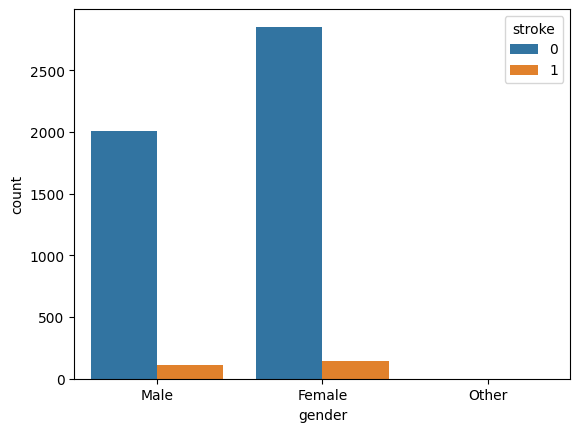

In [93]:
sb.countplot(x="gender",data=data,hue="stroke")

<Axes: xlabel='gender', ylabel='count'>

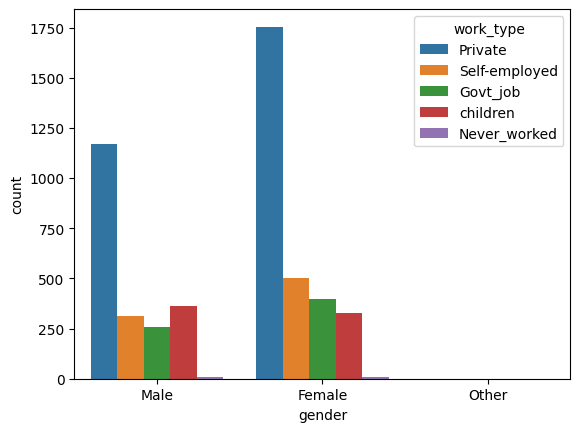

In [51]:
sb.countplot(x="gender",data=data,hue="work_type")

<Axes: xlabel='gender', ylabel='count'>

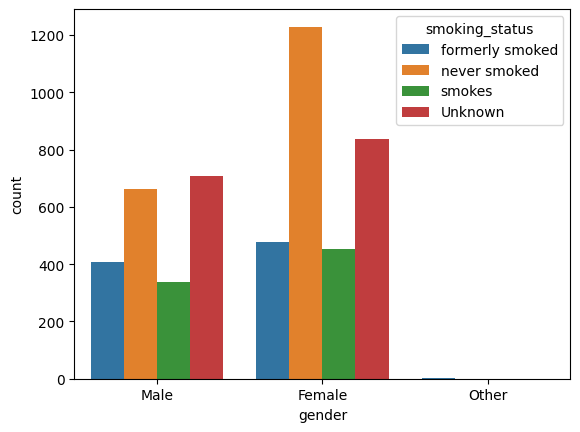

In [52]:
sb.countplot(x="gender",data=data,hue="smoking_status")

<Axes: xlabel='gender', ylabel='count'>

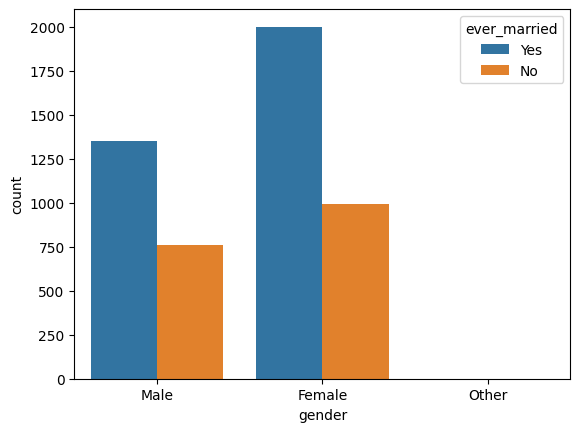

In [53]:
sb.countplot(x="gender",data=data,hue="ever_married")


<Axes: xlabel='gender', ylabel='count'>

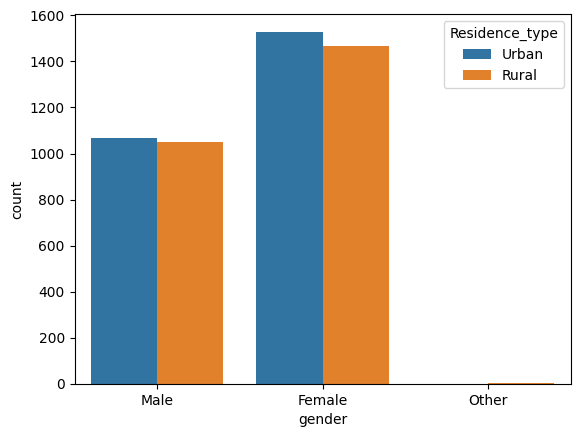

In [54]:
sb.countplot(x="gender",data=data,hue="Residence_type")

### Data Separation

In [94]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [160]:
data.shape

(5110, 12)

In [161]:
new_data = pd.DataFrame()
new_data = data

In [162]:
new_data["gender"]=data["gender"].map({"Female":0,"Male":1,"Other":2})
new_data["ever_married"]=data["ever_married"].map({"Yes":1,"No":0})
new_data["work_type"]=data["work_type"].map({"Private":1,"Self-employed":2,"Govt_job":3,"children":4,"Never_worked":5})
new_data["Residence_type"]=data["Residence_type"].map({"Urban":1,"Rural":2})
new_data["smoking_status"]=data["smoking_status"].map({"formerly smoked":1,"never smoked":0,"smokes":2})

In [163]:
new_data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,1,1,228.69,36.6,1.0,1
1,51676,0,61.0,0,0,1,2,2,202.21,NaN,0.0,1
2,31112,1,80.0,0,1,1,1,2,105.92,32.5,0.0,1
3,60182,0,49.0,0,0,1,1,1,171.23,34.4,2.0,1
4,1665,0,79.0,1,0,1,2,2,174.12,24.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,1,1,1,83.75,NaN,0.0,0
5106,44873,0,81.0,0,0,1,2,1,125.20,40.0,0.0,0
5107,19723,0,35.0,0,0,1,2,2,82.99,30.6,0.0,0
5108,37544,1,51.0,0,0,1,1,2,166.29,25.6,1.0,0


In [164]:
nan_rows_count = new_data.isnull().sum(axis=1).sum()
nan_rows_count

1745

In [165]:
new_data = new_data.dropna()

In [166]:
new_data.shape

(3426, 12)

In [175]:
X_featue = new_data.iloc[:,1:11]
Y_targer = new_data.loc[:,"stroke"]

### Split the Data into Training and Testing

In [173]:
from sklearn.model_selection import train_test_split

In [176]:
X_trian,X_test,Y_train,Y_test=train_test_split(X_featue,Y_targer,test_size=.3,random_state=101)

In [177]:
len(X_test)

1028

### Logistic Regression

In [178]:
from sklearn.linear_model import LogisticRegression

In [179]:
lr_model=LogisticRegression()
lr_learner=lr_model.fit(X_trian,Y_train)

C:\Users\anike\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Accuracy LR Model

In [180]:
from sklearn.metrics import accuracy_score

In [181]:
YP_lr=lr_learner.predict(X_test)
acc_lr=accuracy_score(YP_lr,Y_test)*100
print(f"Accuray of LR Model is {acc_lr}")

Accuray of LR Model is 94.64980544747081


### Decision Tree 

In [182]:
model_dt=DecisionTreeClassifier(random_state=0)
dt_learner=model_dt.fit(X_trian,Y_train)

In [183]:
YP_dt=dt_learner.predict(X_test)
acc_dt=accuracy_score(YP_dt,Y_test)*100
print(f"Accuray of DT Model is {acc_dt}")

Accuray of DT Model is 90.36964980544747


### Classification Report 

In [184]:
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay

### Logistic Regression

In [185]:
cr_lr=classification_report(Y_test,YP_lr)
print("Classification Report for LR",cr_lr)

Classification Report for LR               precision    recall  f1-score   support

           0       0.95      1.00      0.97       974
           1       0.00      0.00      0.00        54

    accuracy                           0.95      1028
   macro avg       0.47      0.50      0.49      1028
weighted avg       0.90      0.95      0.92      1028



### Decision Tree 

In [186]:
cr_dt=classification_report(Y_test,YP_dt)
print("Classification Report for LR",cr_dt)

Classification Report for LR               precision    recall  f1-score   support

           0       0.95      0.95      0.95       974
           1       0.13      0.15      0.14        54

    accuracy                           0.90      1028
   macro avg       0.54      0.55      0.54      1028
weighted avg       0.91      0.90      0.91      1028



### Important Feature 

In [187]:
dt_learner.feature_importances_

array([0.01997008, 0.18850515, 0.05187696, 0.0235493 , 0.00837357,
       0.05045302, 0.01706549, 0.32249167, 0.27235253, 0.04536223])

In [188]:
feature_score=pd.Series(dt_learner.feature_importances_,index=X_trian.columns).sort_values(ascending=False)

In [189]:
feature_score

avg_glucose_level    0.322492
bmi                  0.272353
age                  0.188505
hypertension         0.051877
work_type            0.050453
smoking_status       0.045362
heart_disease        0.023549
gender               0.019970
Residence_type       0.017065
ever_married         0.008374
dtype: float64

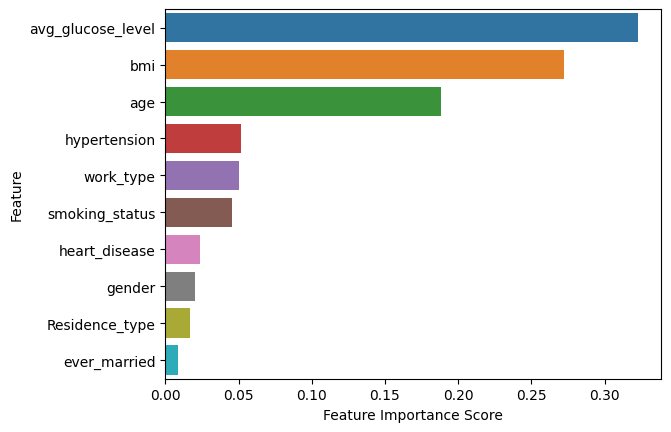

In [190]:
sb.barplot(x=feature_score,y=feature_score.index)
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.show()

### Random Forest Classifier

In [191]:
from sklearn.ensemble import RandomForestClassifier

In [192]:
model_rf=RandomForestClassifier(random_state=0,n_estimators=10)

In [193]:
rf_learner=model_rf.fit(X_trian,Y_train)

In [194]:
Yp_rf=rf_learner.predict(X_test)

In [195]:
acc_rf=accuracy_score(Y_test,Yp_rf)*100
print("acc of rf is",acc_rf)

acc of rf is 94.3579766536965


In [196]:
feature_score_rf=pd.Series(rf_learner.feature_importances_,index=X_trian.columns).sort_values(ascending=False)

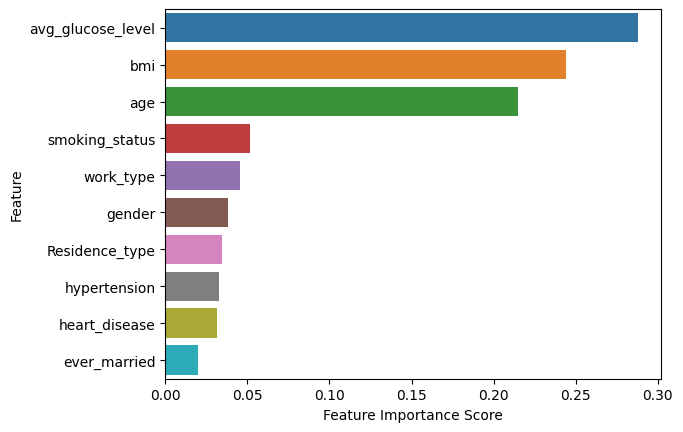

In [197]:
sb.barplot(x=feature_score_rf,y=feature_score_rf.index)
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.show()